In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import warnings
# warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Load the dataset

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The average transaction is $88.35.  Only 0.17% (492) of (287407) transctions are fraud (highly unbalanced).

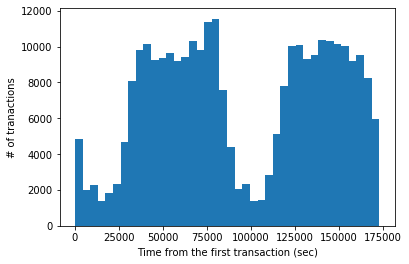

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(df.Time, bins=40)
plt.xlabel('Time from the first transaction (sec)')
plt.ylabel('# of tranactions')
plt.show()

In [8]:
# Create a new feature:  Time in the day
# since 'Time' is recorded as seconds from the first transaction, ...
# we can make time relevant by substract 86400 from time.... then divided by 86400
# T is the fraction of the time in a day (normalized)


df['T']= [n/86400 if n<86400 else (n-86400)/86400 for n in df['Time']]



import math

# Create logarithm of Amount
# because the original amount is very screwed.  

df['log_amount']=[0 if n<=1 else math.log10(n) for n in df['Amount']]

# Further normalized amount so that the whole dataset is standardized

from sklearn.preprocessing import StandardScaler

df['nor_amount']= StandardScaler().fit_transform(df['log_amount'].values.reshape(-1,1))

df=df.drop(columns=['Time', 'Amount', 'log_amount'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,T,nor_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,1.097442
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-1.111041
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000012,1.607740
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000012,0.992002
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000023,0.679907


## Split the dataset for testing purpose

In [9]:

x= df.drop('Class', axis=1)
y= df['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Class in training dataset: {}'.format(y_train.value_counts()))
print('Class in testing dataset: {}'.format(y_test.value_counts()))



Class in training dataset: 0    227451
1       394
Name: Class, dtype: int64
Class in testing dataset: 0    56864
1       98
Name: Class, dtype: int64


## Create a more balanced dataset from training dataset
Since more than 99% of the data are fraudulent free, we would like to have a dataset that is more balanced to predict fraud.  Otherwise, the accuracy of 99% does not mean the frauds are labeled.   

In [11]:
## oversampling 
from imblearn.over_sampling import SMOTE
# Create new dataset X_res, Y_res (res stand for resampling)
smt=SMOTE(random_state=42)
x_res, y_res= smt.fit_resample(X_train, y_train)
# reassign the column names
X_res= pd.DataFrame(data=x_res, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'T', 'log_amount'])
Y_res=pd.DataFrame(data=y_res, columns=['Class'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [12]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res2, y_res2 = rus.fit_resample(x, y)
# reassign the column names
X_res2= pd.DataFrame(data=x_res2, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'T', 'log_amount'])
Y_res2=pd.DataFrame(data=y_res2, columns=['Class'])

In [13]:
# Show same number of 0s and 1s after SMOTE resampling
Y_res.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [14]:
Y_res2.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

This would create a dataset for the same number of frauds as the non-frauds.  By undersampling the majority group (Class =1), the new dataset contains equal number of Class 0 and Class 1.

Correlation Map for all

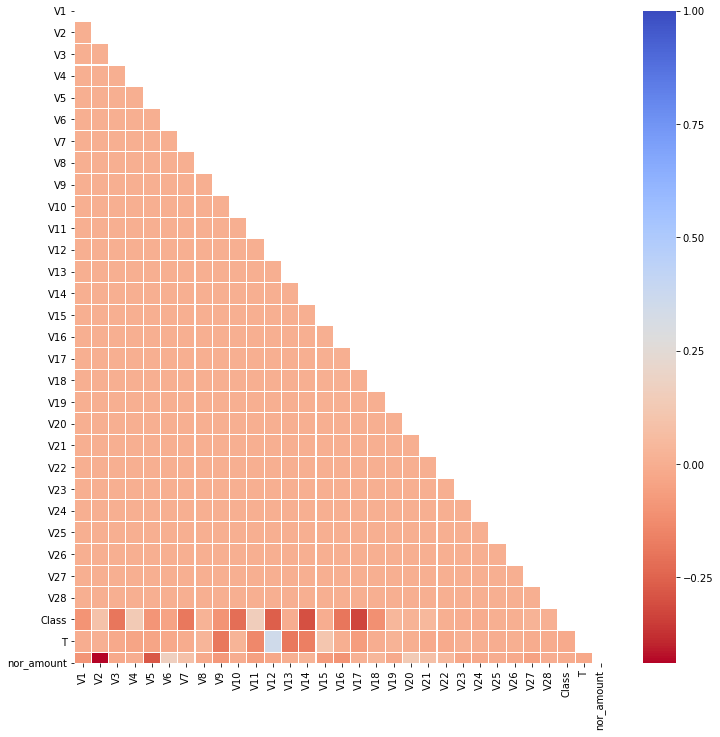

In [15]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, cmap='coolwarm_r', annot=False, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

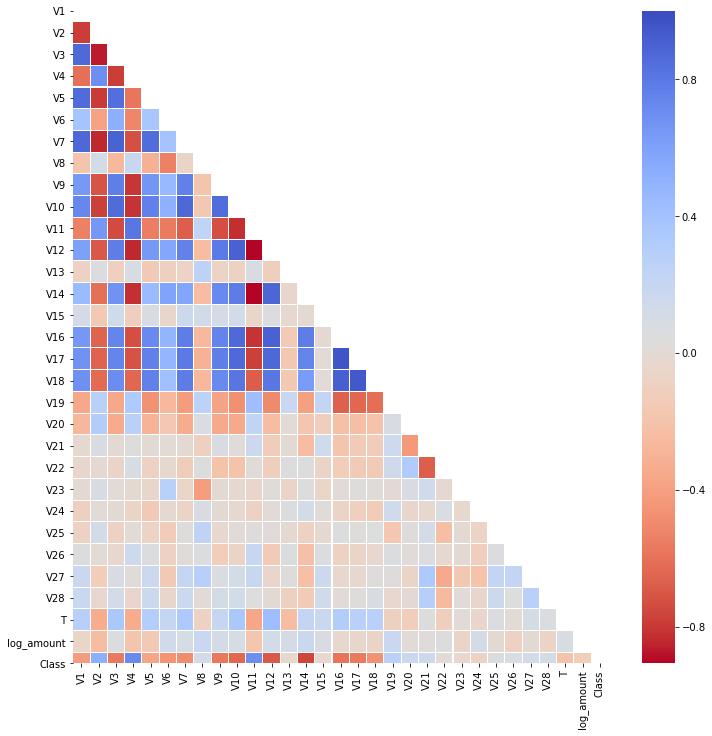

In [16]:
train=pd.concat([X_res, Y_res], axis=1)

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm_r', annot=False, linewidths=.1, fmt= '.1f',ax=ax)
plt.show()

V1, V3, V5, V7, V9, V10, V12, V14, V16, V17 and V18 are inversely correlated to Class while V2, V4 and V11 are highly correlated in the Resampled dataset. 

In [17]:
train.shape

(454902, 31)

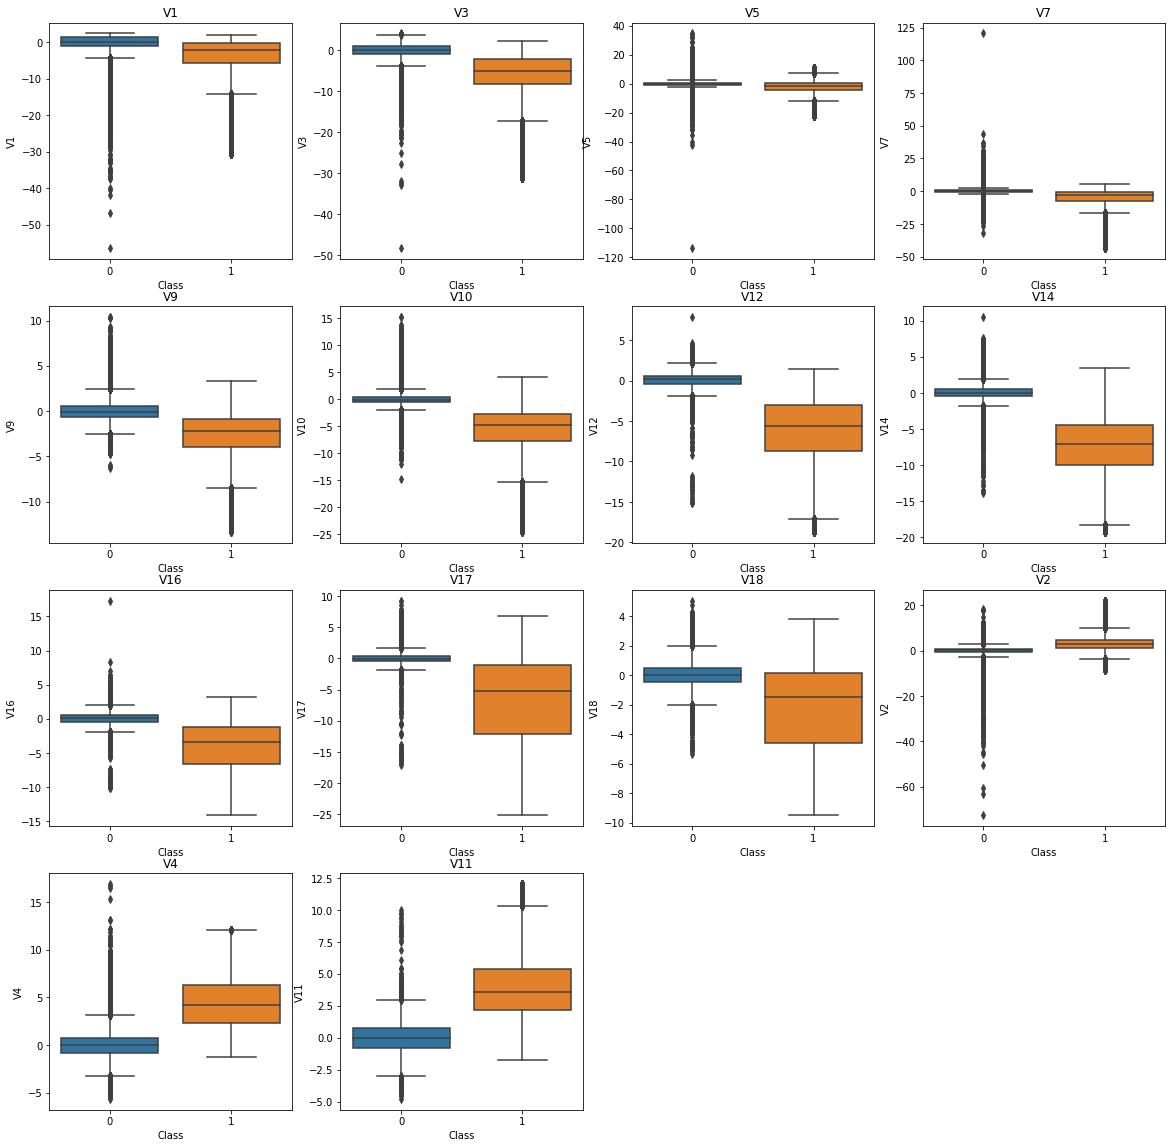

In [18]:
import seaborn as sns

columns_of_interest=['V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2','V4','V11']

# f, axes = plt.subplots(ncols=4, figsize=(20,4))
# sns.boxplot(x="Class", y="V17", data=train, ax=axes[0])
# axes[0].set_title('V17 vs Class Negative Correlation')

plt.figure(figsize=(20,20))

for i, column in enumerate(columns_of_interest, start = 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x="Class", y=column, data=train)
    plt.title(column)    

plt.show()


# Artificial Neural Network Model (Keras)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

# The model expects 31 input_dim (X_train.shape[1]) With 4 layers and 1 dropout
# First hidder layer has 24 nodes with retified linear unit activation function
# Second hidder layer has 20 nodes
# Dropout with p =0.5
# Thrid hidder layer 10 nodes
# Fourth hidder layer 8 nodes
# last output layer uses sigmoid function


model = Sequential([
    Dense(units=24, input_dim = X_res.shape[1], activation='relu'),
    Dense(units=20,activation='relu'),
    Dropout(0.5),
    Dense(units=10,activation='relu'),
    Dense(units=8,activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,551
Tra

In [20]:
# Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train model
model.fit(X_res, Y_res, validation_data=(X_test, y_test), batch_size=30, epochs=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 454902 samples, validate on 56962 samples
Epoch 1/5
454902/454902 [==============================] - 27s 59us/step - loss: 0.0434 - acc: 0.9840 - val_loss: 0.0196 - val_acc: 0.9950
Epoch 2/5
454902/454902 [==============================] - 26s 57us/step - loss: 0.0138 - acc: 0.9962 - val_loss: 0.0135 - val_acc: 0.9977
Epoch 3/5
454902/454902 [==============================] - 24s 53us/step - loss: 0.0105 - acc: 0.9973 - val_loss: 0.0138 - val_acc: 0.9979
Epoch 4/5
454902/454902 [==============================] - 26s 56us/step - loss: 0.0086 - acc: 0.9979 - val_loss: 0.0134 - val_acc: 0.9981
Epoch 5/5
454902/454902 [==============================] - 25s 54us/step - loss: 0.0077 - acc: 0.9981 - val_loss: 0.0116 - val_acc: 0.9984


In [21]:
# make prediction
y_pred = model.predict(X_test, verbose =1)

56962/56962 [==============================] - 1s 14us/step


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
display(cm)

array([[56788,    76],
       [   13,    85]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.87      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



## Summary for ANN

Since the data is unbalanced and there is only less than 1% of fraud incident, the accuracy is not a good metric to realize the model performance.  'Recall' and 'f1-score' are better metrics in this case.  We found 89% of recall (meaning 87 out of 98 fraud cases are called out), and only 107 false-positive cases.  F1-score is 0.60.  

# Logistic Regression Classifier

In [24]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create logistic regression
logistic = linear_model.LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)


In [25]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-1, 1, num=5)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [26]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [27]:
# Fit grid search
best_model = clf.fit(X_res, Y_res.values.ravel())

In [28]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [29]:
y_pred=best_model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [30]:
cm = confusion_matrix(y_test, y_pred.round())
display(cm)

array([[55385,  1479],
       [    8,    90]], dtype=int64)

## Summary for Logistic Regression Classifier
In this case, recall is 92% (90 out of 98 fraud cases are called).  However, f1-score is 0.11.  This is because while the recall increases, the false-positive cases are rising (1479 false positive cases).  Compared to ANN model, the Logistic Regression model finds 3 more fraud cases but also have 1372 more false-positive cases.

# Random Forest

In [31]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(random_state=42, n_estimators=10)
rfc.fit(X_res,Y_res.values.ravel())

# prediction

y_pred = rfc.predict(X_test)


In [32]:
print(classification_report(y_test, y_pred.round()))
cm = confusion_matrix(y_test, y_pred.round())
display(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.85      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56858,     6],
       [   15,    83]], dtype=int64)

## Summary for random forest classifier
Random forest classifier has 85% recall and very good f1-score 0.89.  

# Conclusion
In this capstone project, artificial neural network (ANN) model, logistic regression model, and random forest are used to predict fraud.  The accuracy, however, is not a suitable metrics to evaluate the model performance.  Instead, recall and f1-score are better metrics.  ANN model presents a good model in both f1-score and recall.  Logistic regression has a highest score in terms of recall.  Random forest has the best performance of all three with 0.85 recall and 0.89 f1-score. 

# Clustering

## K-Means

In Clustering section, the dataset is the undersampling dataset.  

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000).fit(X_res)
y_pred = kmeans.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.32      0.45        98

    accuracy                           1.00     56962
   macro avg       0.90      0.66      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
cm = confusion_matrix(y_test, y_pred.round())
display(cm)

array([[56856,     8],
       [   67,    31]], dtype=int64)

This clustering will create a lot of false negative, meaning the fraudulent case were left undetected.  Recall and precision are both unsatisfactory.  

## PCA and K-Means

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
principalComponents = pca.fit_transform(X_res2)

In [36]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y_res2], axis = 1)

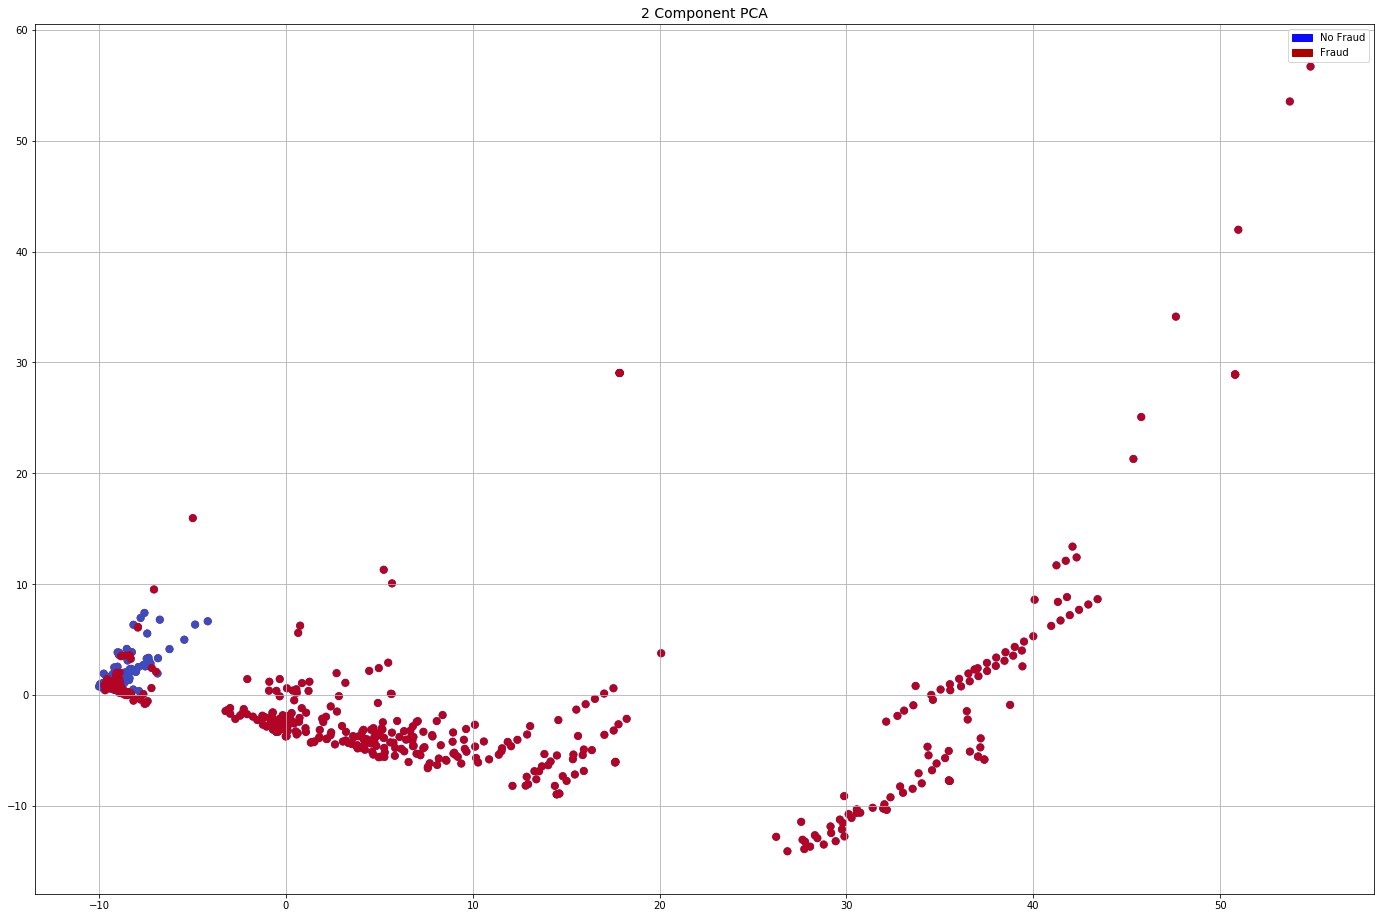

In [37]:
import matplotlib.patches as mpatches


f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=(finalDf['Class'] == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=(finalDf['Class'] == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('2 Component PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])
plt.show()

The plot shows the fraud cases (blue) are focused in one area.  Is it good for classification? 

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000).fit(principalDf)
kmeans.cluster_centers_


array([[-9.0847839 ,  1.15123775],
       [35.20866171,  1.78889485],
       [ 5.26936576, -3.2971418 ]])

In [39]:
y_pred=kmeans.labels_

from collections import Counter
Counter(y_pred)

Counter({0: 599, 2: 271, 1: 114})

So 492 out of 599 is called. The recall is 82%.  